# Modeling and Simulation in Python

Chapter 20

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [43]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math

### Exercises

**Exercise:** Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Use `run_ode_solver` to answer this question.

Here are some suggestions about how to proceed:

1.  Look up the Law of Universal Gravitation and any constants you need.  I suggest you work entirely in SI units: meters, kilograms, and Newtons.

2.  When the distance between the Earth and the Sun gets small, this system behaves badly, so you should use an event function to stop when the surface of Earth reaches the surface of the Sun.

3. Express your answer in days, and plot the results as millions of kilometers versus days.

If you read the reply by Dave Rothstein, you will see other ways to solve the problem, and a good discussion of the modeling decisions behind them.

You might also be interested to know that [it's actually not that easy to get to the Sun](https://www.theatlantic.com/science/archive/2018/08/parker-solar-probe-launch-nasa/567197/).

In [113]:
init = State(x=149e9, y=0, vx=0, vy=30000)

,values
x,1.490000e+11
y,0.000000e+00
vx,0.000000e+00
vy,3.000000e+04


In [114]:
m_s = 1.989e30
m_e = 5.972e24
G = 6.67e-11
t_end = 1e8
system = System(init=init, m_s=m_s, m_e=m_e, G=G, t_end=t_end)

,values
init,x 1.490000e+11 y 0.000000e+00 vx 0....
m_s,1.989e+30
m_e,5.972e+24
G,6.67e-11
t_end,1e+08


In [115]:
def calc_F(state, system):
    x, y, vx, vy = state
    unpack(system)    

    r = Vector(x, y)
    
    f = G* (m_e*m_s)/(r.mag)**2
    #A,B = pol2cart(-r.angle,f)
    A = f*math.cos(r.angle)
    B = f* math.sin(r.angle)
    F = Vector(A,B)
    
    return F

In [116]:
def slope_func(state, t, system):
    
    
    x, y, vx, vy = state
    unpack(system)    

    F = -calc_F(state, system)
    
    
    dxdt = vx  
    dydt = vy
    dvxdt = F[0]/m_e
    dvydt = F[1]/m_e
    
    return dxdt, dydt, dvxdt, dvydt

In [117]:
dxdt, dydt, dvxdt, dvydt = slope_func(init, 0, system)
print(dydt)
print(dxdt)
print(dvxdt)
print(dvydt)

30000.0
0.0
-0.005975690284221432 dimensionless
-0.0 dimensionless


In [118]:
results, details = run_ode_solver(system, slope_func)
details.message

'The solver successfully reached the end of the integration interval.'

In [119]:
results.index /= 60*60*24
results.x /= 1e9
results.y /= 1e9

In [120]:
results

,x,y,vx,vy
0.000000e+00,149.000000,0.000000e+00,0.000000e+00,30000.000000
5.456071e-13,149.000000,1.414214e-12,-2.816967e-10,30000.000000
6.001678e-12,149.000000,1.555635e-11,-3.098664e-09,30000.000000
6.056239e-11,149.000000,1.569777e-10,-3.126834e-08,30000.000000
6.061695e-10,149.000000,1.571191e-09,-3.129651e-07,30000.000000
6.062240e-09,149.000000,1.571333e-08,-3.129932e-06,30000.000000
6.062295e-08,149.000000,1.571347e-07,-3.129961e-05,30000.000000
6.062300e-07,149.000000,1.571348e-06,-3.129963e-04,30000.000000
6.062301e-06,149.000000,1.571348e-05,-3.129964e-03,30000.000000
6.062301e-05,149.000000,1.571348e-04,-3.129964e-02,30000.000000


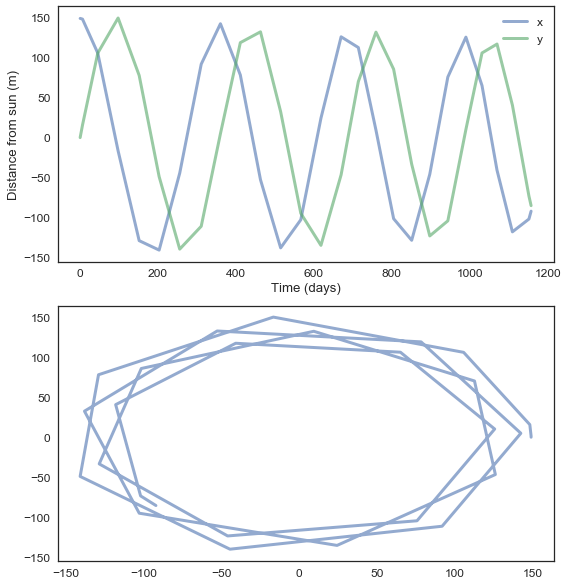

In [121]:
def plot_position(results):
    subplot(2,1,1)
    plot(results.x, label='x')
    plot(results.y, label='y')
    decorate(xlabel='Time (days)',
             ylabel='Distance from sun (m)')
    subplot(2,1,2)
    plot(results.x, results.y, label='Posotion')
    
plot_position(results)

In [125]:
year = 60*60*24*360
ts = linspace(0,year)
results, details = run_ode_solver(system, slope_func, t_eval=ts)
details.message

results.index /= 60*60*24
results.x /= 1e9
results.y /= 1e9

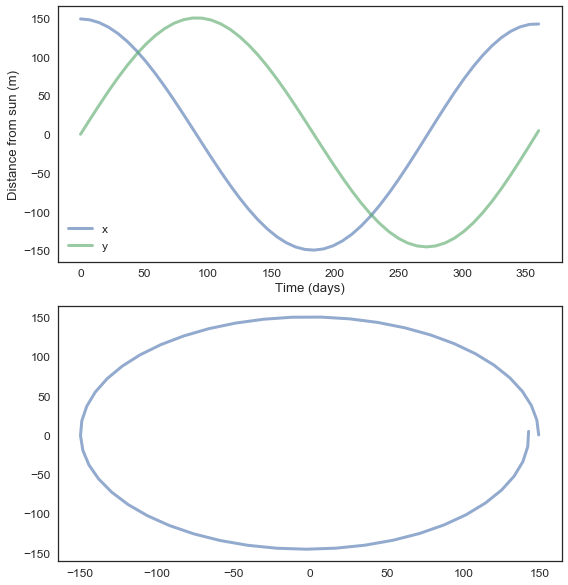

In [126]:
def plot_position(results):
    subplot(2,1,1)
    plot(results.x, label='x')
    plot(results.y, label='y')
    decorate(xlabel='Time (days)',
             ylabel='Distance from sun (m)')
    subplot(2,1,2)
    plot(results.x, results.y, label='Posotion')
    
plot_position(results)

In [122]:
def event_func(state, t, system):
    """Return the height of the penny above the sidewalk.
    """
    x,y,vx,vy = state
    return k

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here